# Project 12 Fraud_Loan_Prediction
--> Aim is to Predict weather to give the person Loan or not

## Lets Load the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Lets Load the Dataset

In [2]:
data=pd.read_csv("Fraud_loan.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Information of the data
-Loan_ID: ID of the loan.

-Gender: Gender of a person.

-Married: weather a person is married or not.

-Dependents: weather the person have a dependent or not.

-Education: Edutional cirteria weather the person is graduate or not.

-Self_Employed: Weather the person is self Employeed or Not(must be Salaried)

-ApplicantIncome: Income of the applicant

-CoapplicantIncome: Income of the coapplicant

-LoanAmount: Amount of Loan given.

-Loan_Amount_Term: Time limit of the loan amount given.

-Credit_History: Credit history of applicant.

-Property_Area: type of area in which applicant's Property is located.

-Loan_Status: Approved or Not.


## Checking Null Values

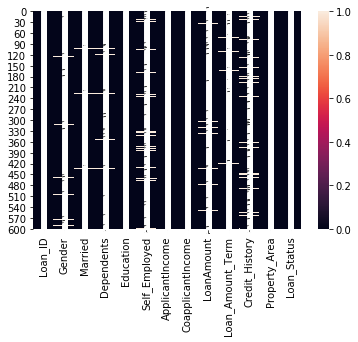

In [4]:
sns.heatmap(data.isnull(),annot=True)

In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data["Gender"].fillna('Male',inplace=True)

In [7]:
#Lets consider the people who didn't disclosed their marriages might be diveroced or seperated or single
data['Married'].fillna('No', inplace=True)

In [8]:
data['Dependents'].fillna(0, inplace=True)

In [9]:
data["Self_Employed"].fillna('No', inplace=True)

In [10]:
#Its very hard o fill the accurate missing value for loan amount as we can calculate the loan amount eligbility based on the applicant and coapplicant income but loan requiremnt can be low of that applicant
data["LoanAmount"].fillna(data["LoanAmount"].median(), inplace=True)

In [11]:
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mean(), inplace=True)

In [12]:
# lets conider people with missing Credit History with 0 credit History
data["Credit_History"].fillna(0, inplace=True)

In [13]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002498F151988>,
      dtype=object)

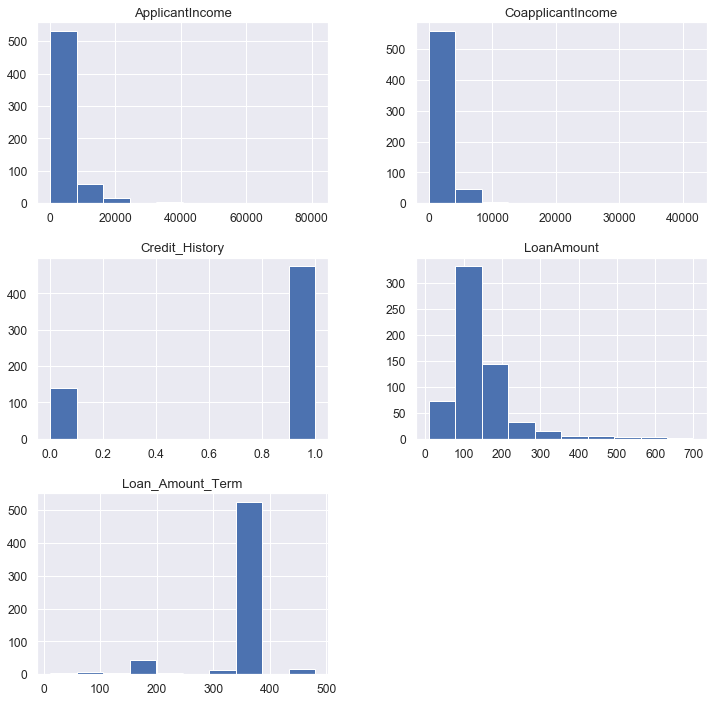

In [15]:
sns.set(style="darkgrid", palette='deep', font_scale=1.1)
data.hist(figsize=(12,12))

From the above data we can see that most of the data are postively and negatively skewed.

## Lets Check our Categorical and Numerical Features.

In [16]:
data.drop(['Loan_ID'],axis=1,inplace=True)

In [17]:
data.columns.to_series().groupby(data.dtypes).groups

{dtype('int64'): Index(['ApplicantIncome'], dtype='object'),
 dtype('float64'): Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
        'Credit_History'],
       dtype='object'),
 dtype('O'): Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
        'Property_Area', 'Loan_Status'],
       dtype='object')}

In [18]:
data_int=data[['ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
        'Credit_History']].copy()

In [19]:
data_cat=data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
        'Property_Area', 'Loan_Status']].copy()

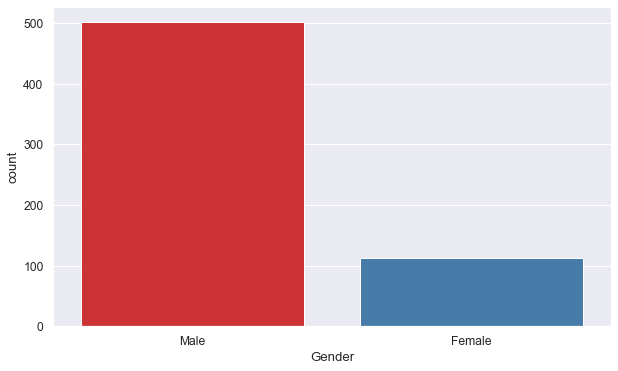

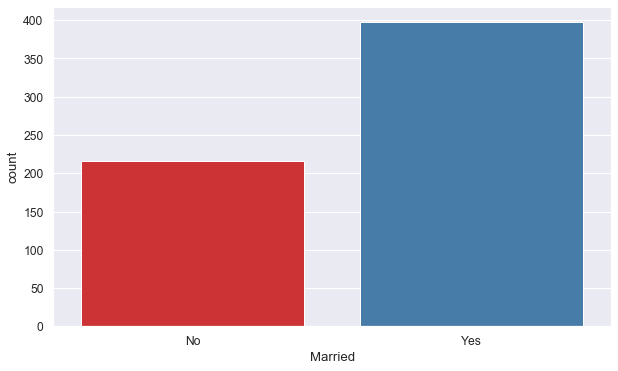

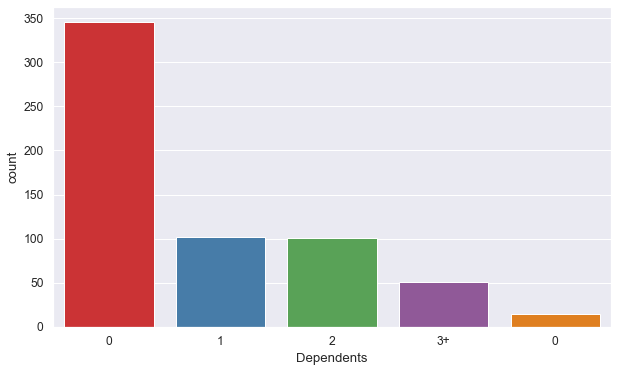

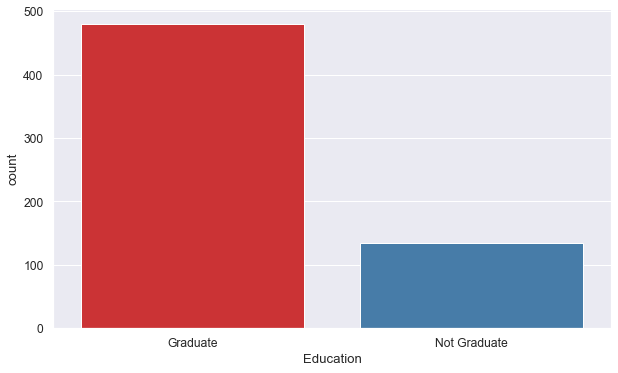

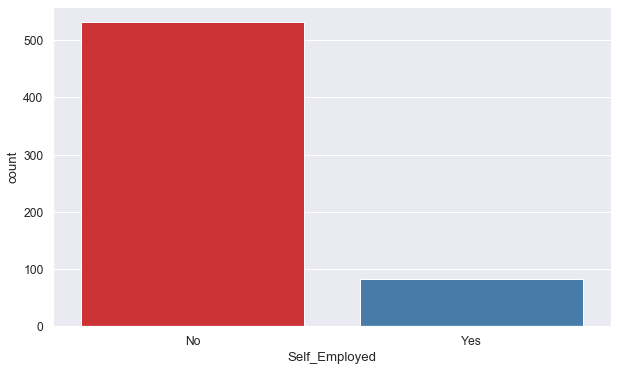

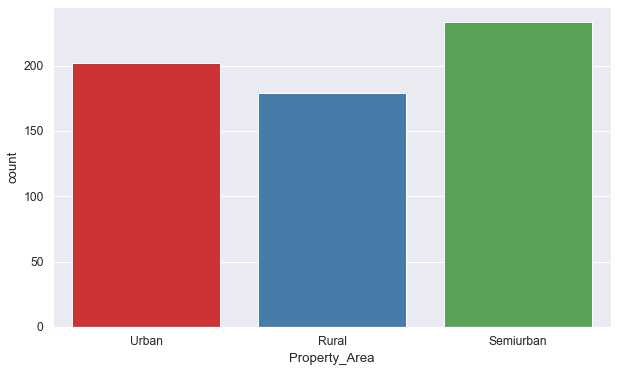

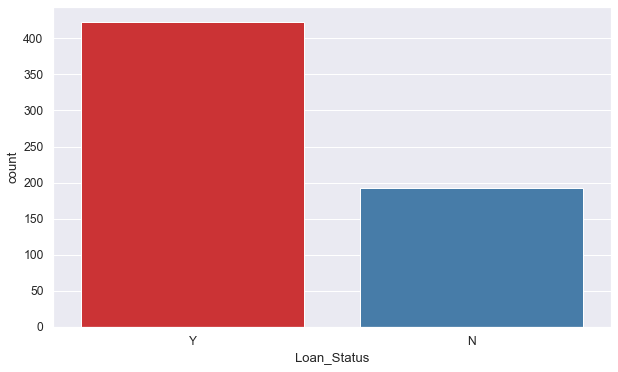

In [20]:
   for feature in data_cat:
        plt.figure(figsize=(10,20))
        plt.subplot(311)
        sns.countplot(data[feature],palette="Set1")

From the above set of graphs we can see that most of the applicants are Male, most of the applicants are Graduate, most of the applicants are Married, most of the applicants have no dependents, most of the applicants are not self employed, most of the applicants are from semi urban region. 

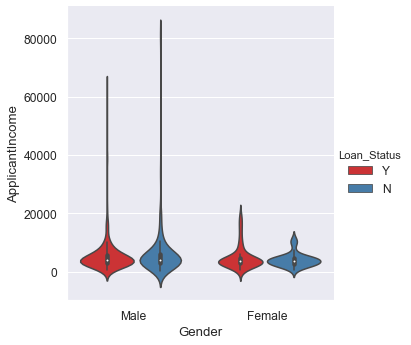

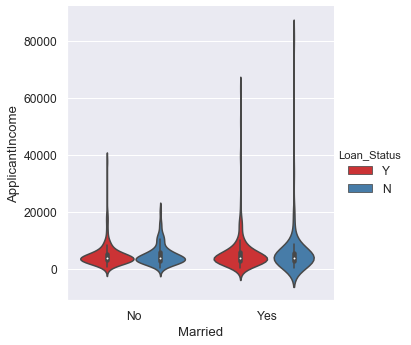

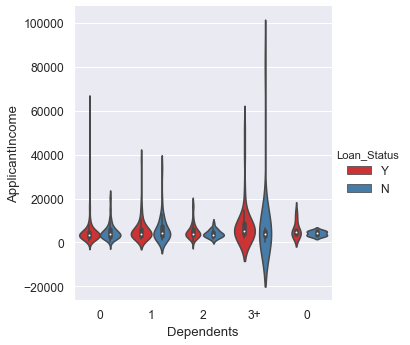

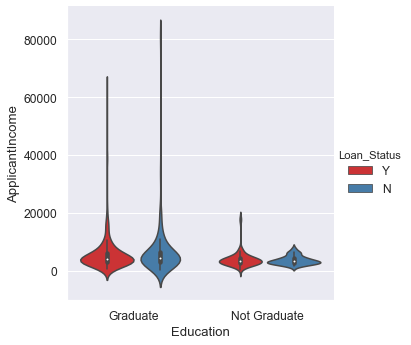

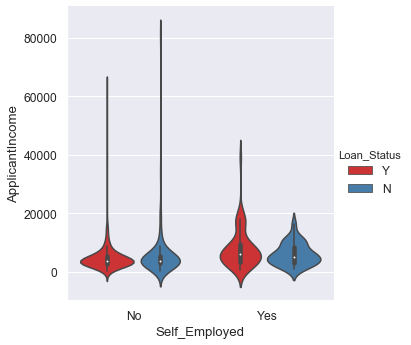

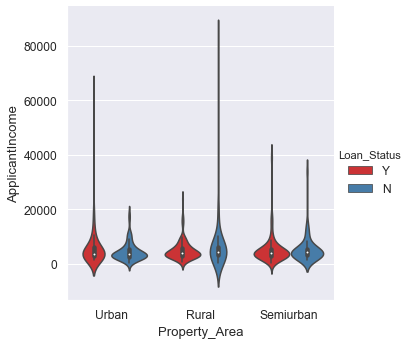

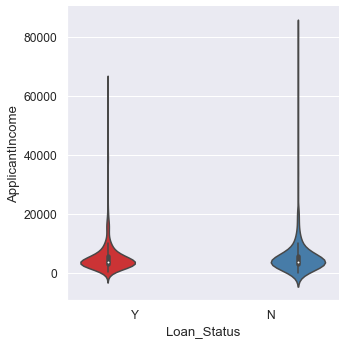

In [21]:
for fea in data_cat:
    sns.catplot(x=fea, y="ApplicantIncome",hue='Loan_Status',data=data, kind='violin',palette='Set1')

From the above sets of graph we can see that the males have silghtly higher chances of Loan approval, and Married people also have high chances for approval as total income is high compare to unmarried applicant,most of gradutaes have loan approvals althouth people with high income has loan status as no, might be because of credit score and as most of properties of applicants with high income are from rural areas.

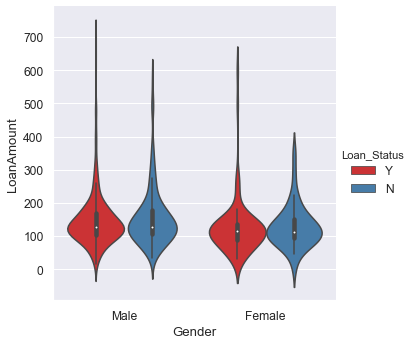

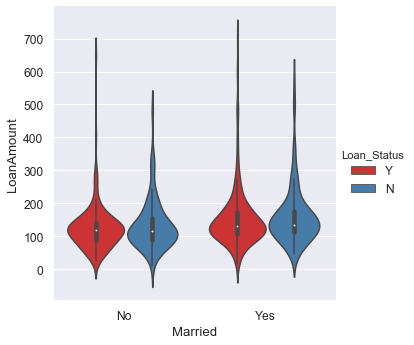

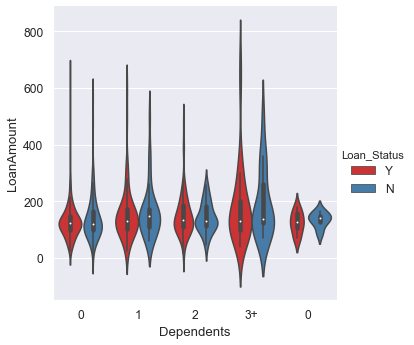

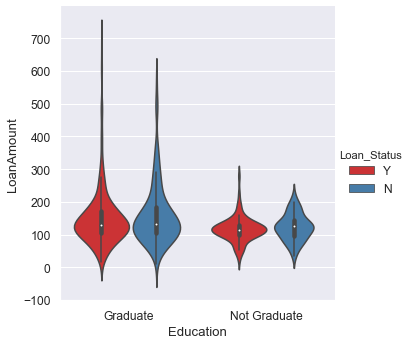

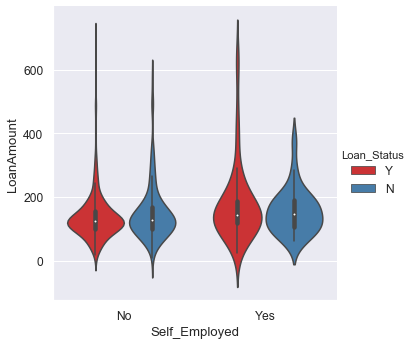

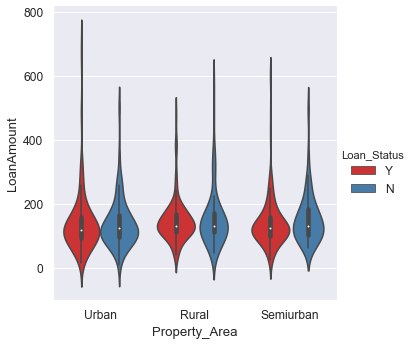

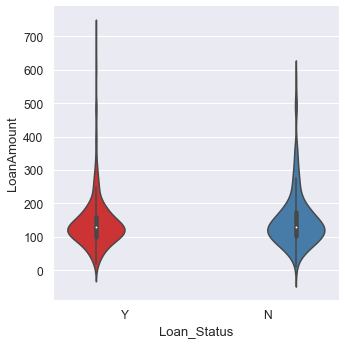

In [22]:
for fe in data_cat:
    sns.catplot(x=fe,y='LoanAmount',hue='Loan_Status',data=data,kind='violin',palette='Set1')

From the above sets of graph we can see that males have got loan approval for more than 200, and most of married applicants were approved for more than 200, most of graduates have got loan approval for more than 200, most of the applicants who got more than 200 are self employed might have own buissness, urban areas people have highest loan amount. 

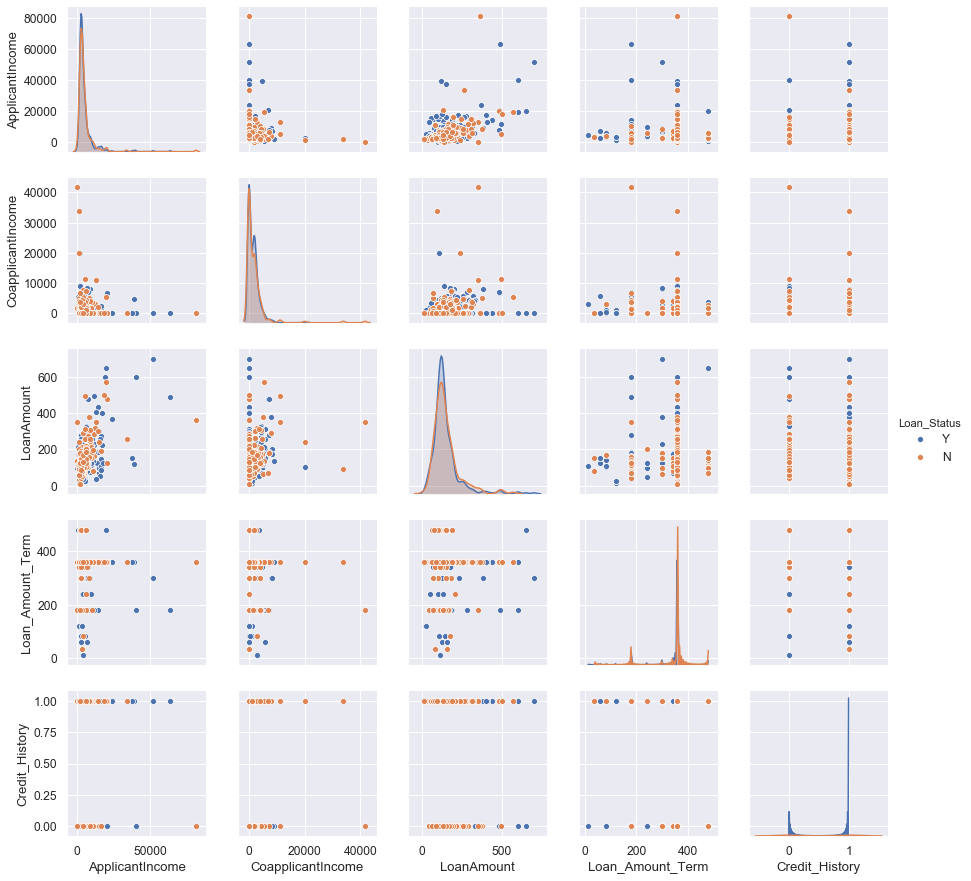

In [23]:
sns.pairplot(data,hue='Loan_Status')

For the above dataset we have not yet checked for correlatoion as our dependent feature is in categorical variable, so heatmap won't take that feature.

## Lets encode our categorical features

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Married']=le.fit_transform(data['Married'])
data['Gender']=le.fit_transform(data['Gender'])
data['Education']=le.fit_transform(data['Education'])
data['Self_Employed']=le.fit_transform(data['Self_Employed'])
data['Loan_Status']=le.fit_transform(data['Loan_Status'])
data['Property_Area']=le.fit_transform(data['Property_Area'])
data['Dependents'] =pd.get_dummies(data['Dependents'], drop_first=True)

## Lets Check the Correlation

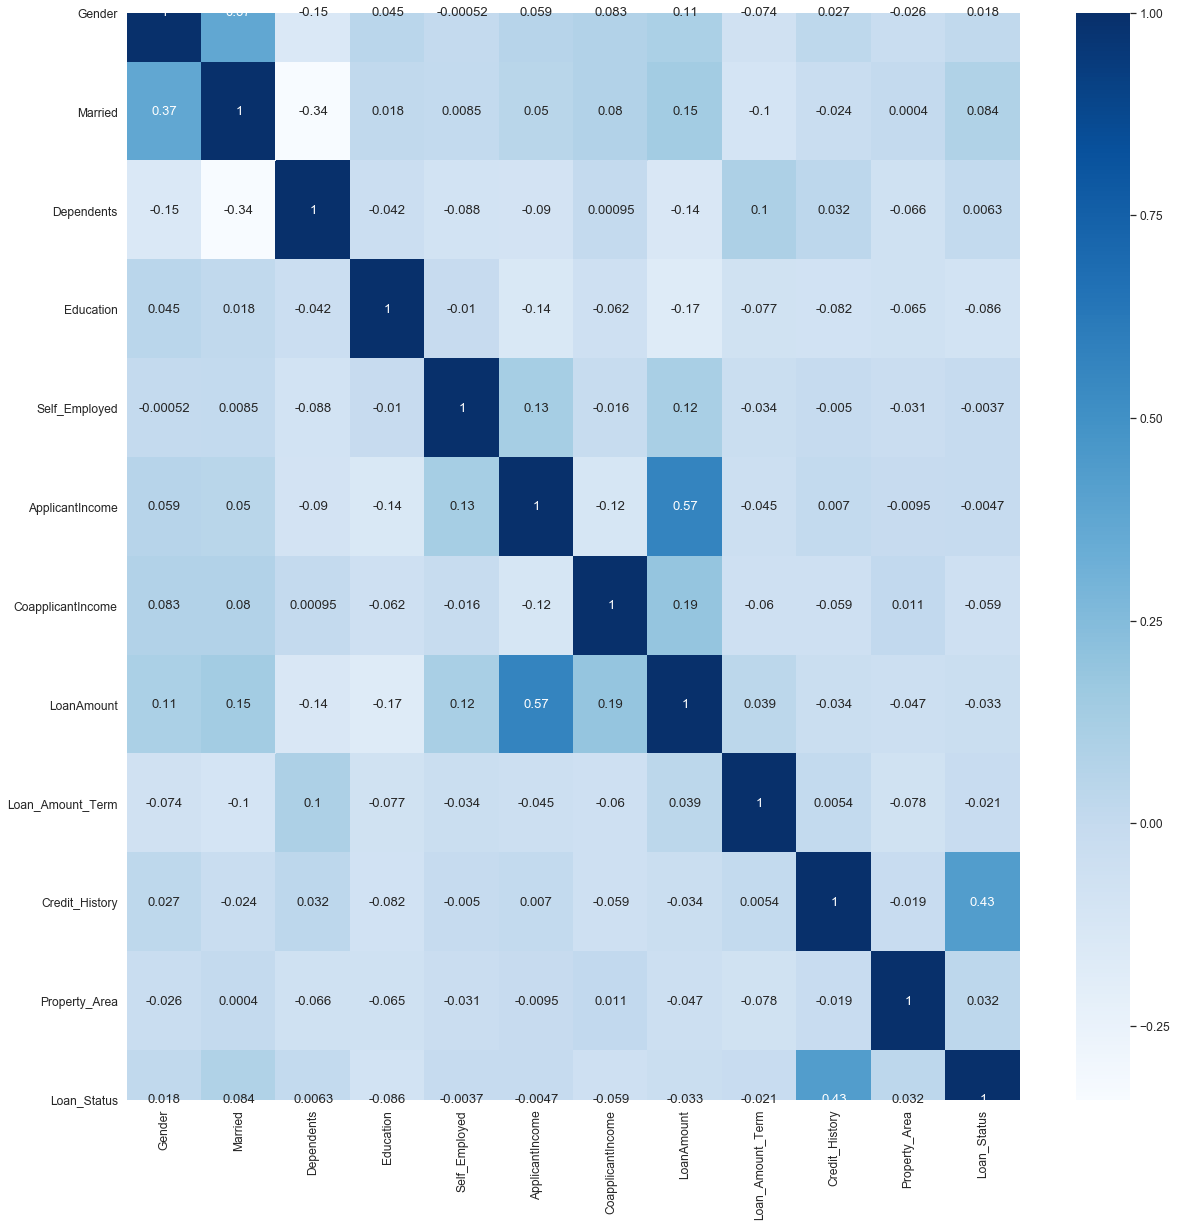

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True, cmap='Blues')

From the above heatmap we can see that few of the features are highly correlated with eachother like Applicant income and Loan Amount, as few of important independent features are negatively correlated with dependent feature will impact our models.

In [26]:
from scipy.stats import zscore
data=data[(np.abs(zscore(data))<3).all(axis=1)]

## Lets Split and scale the data

In [27]:
x=data.iloc[:,:-1]
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,1,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,0,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,1,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,1,0,0,6000,0.0,141.0,360.0,1.0,2


In [28]:
y=data['Loan_Status']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [29]:
from sklearn.preprocessing import MinMaxScaler
ss=MinMaxScaler()
x=ss.fit_transform(x)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=56,stratify=y)

In [31]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((461, 11), (116, 11), (461,), (116,))

## Lets Load the ML Algorithms

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import cross_val_score

In [33]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=56)
GNB=GaussianNB()
RFC=RandomForestClassifier(random_state=56)
GBC=GradientBoostingClassifier(random_state=56)
ABC=AdaBoostClassifier(random_state=56)
ETC=ExtraTreesClassifier(random_state=56)

In [34]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

---------------------> KNeighborsClassifier <----------------------


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score =  0.7068965517241379


Cross_Val_Score =  0.7505304208797857


roc_auc_score =  0.6270833333333333


classification_report
               precision    recall  f1-score   support

           0       0.54      0.42      0.47        36
           1       0.76      0.84      0.80        80

    accuracy                           0.71       116
   macro avg       0.65      0.63      0.63       116
weighted avg       0.69      0.71      0.70       116



[[15 21]
 [13 67]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



---------------------> SVC <----------------------


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_ite

AxesSubplot(0.125,0.808774;0.62x0.0712264)





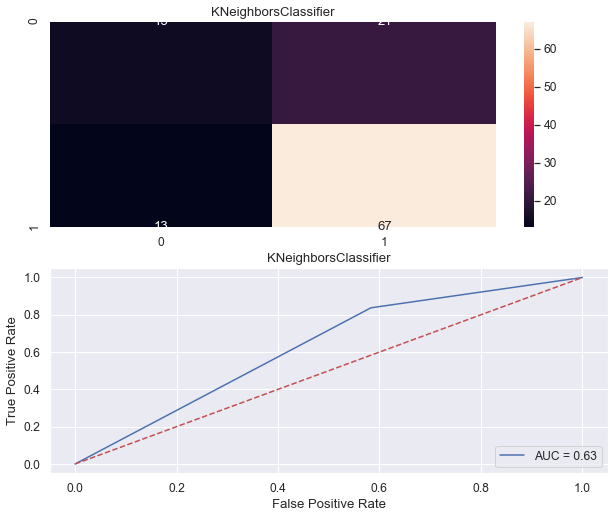

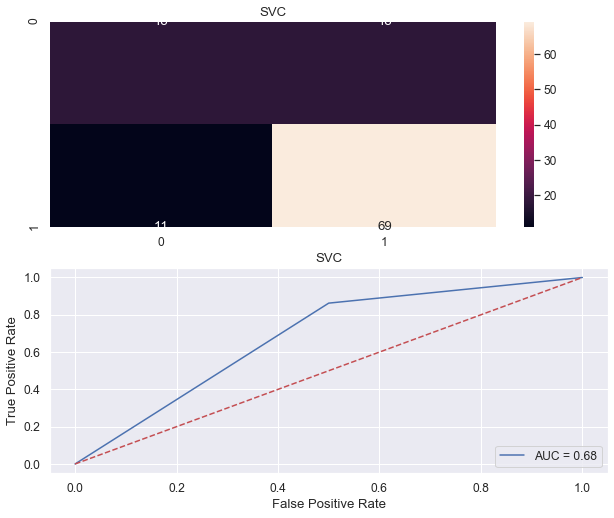

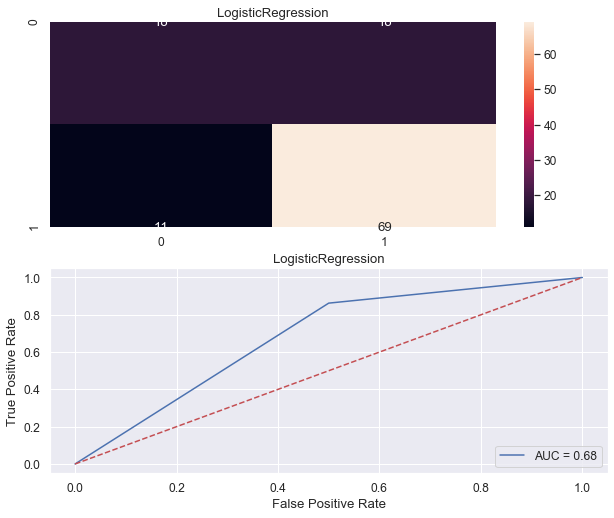

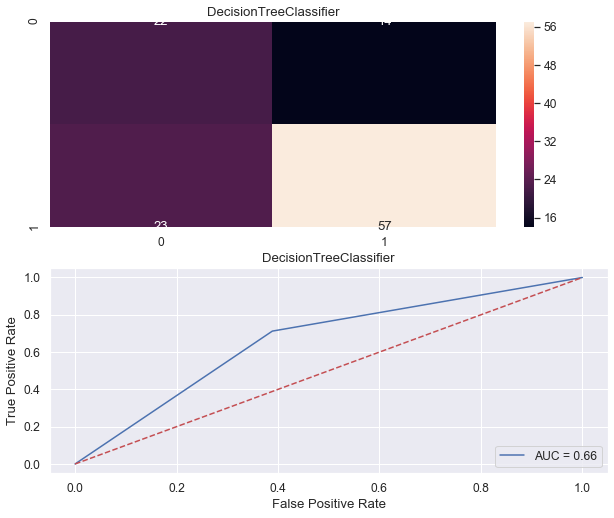

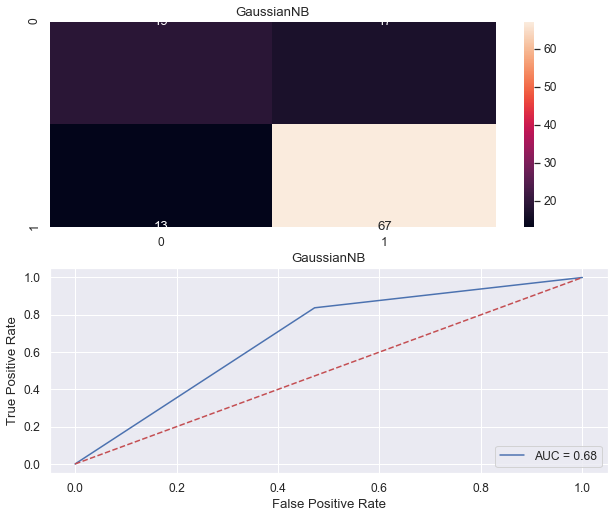

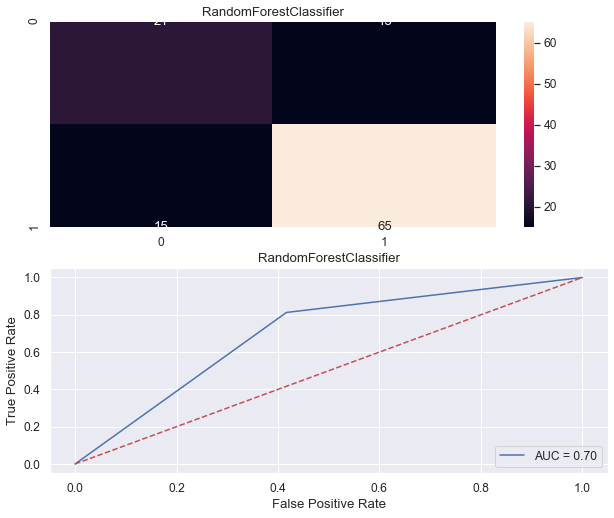

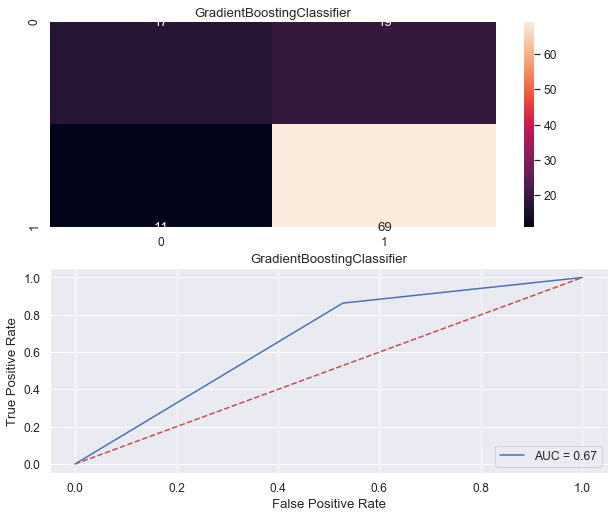

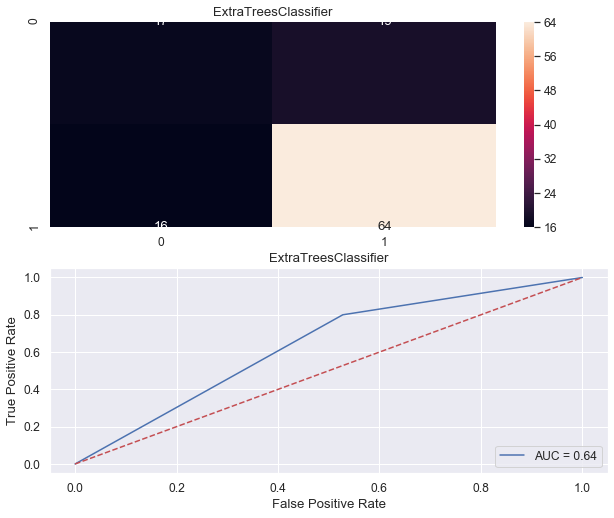

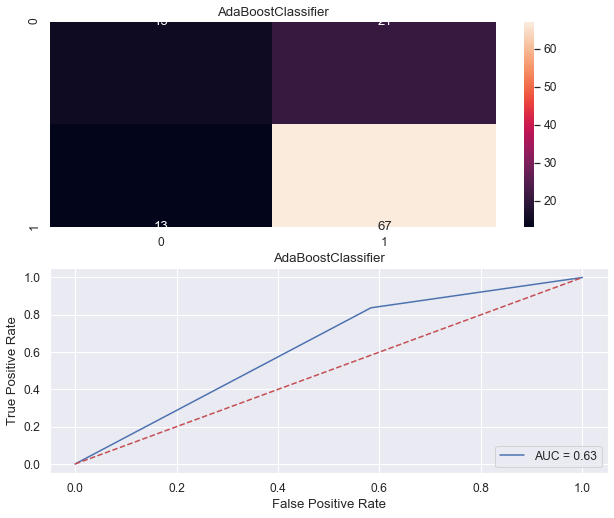

In [35]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('--------------------->',name,'<----------------------')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [36]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,0.706897,0.750530,0.627083
1,SVC,0.750000,0.781873,0.681250
2,LogisticRegression,0.750000,0.781873,0.681250
3,DecisionTreeClassifier,0.681034,0.656908,0.661806
4,GaussianNB,0.741379,0.762847,0.682639
5,RandomForestClassifier,0.741379,0.743391,0.697917
6,GradientBoostingClassifier,0.741379,0.735198,0.667361
7,ExtraTreesClassifier,0.698276,0.715587,0.636111
8,AdaBoostClassifier,0.706897,0.741972,0.627083


From the above we can see that the Logistic Regression and SVC has highest accuracy and crossval score, so lets try hypertunning the SVC model, if we can geta beter score. 

In [37]:
from sklearn.model_selection import GridSearchCV 

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear','poly']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
grid.fit(x_train, y_train) 

Fitting 3 folds for each of 75 candidates, totalling 225 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.688, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.688, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.693, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.812, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.773, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.784, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.688, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.688, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.693, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.812, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.773, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.784, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] ....... C=0.1, gamma=0.1, kernel=poly, score=0.688, total=   0.0s
[CV] 

[CV] ....... C=1, gamma=0.001, kernel=poly, score=0.688, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] ....... C=1, gamma=0.001, kernel=poly, score=0.688, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] ....... C=1, gamma=0.001, kernel=poly, score=0.693, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.688, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.688, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.693, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.812, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .

[CV] ....... C=100, gamma=1, kernel=linear, score=0.784, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ......... C=100, gamma=1, kernel=poly, score=0.747, total=   0.5s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ......... C=100, gamma=1, kernel=poly, score=0.695, total=   1.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ......... C=100, gamma=1, kernel=poly, score=0.693, total=   1.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.779, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.779, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.778, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .

[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.799, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.773, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.784, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.812, total=  35.7s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.773, total=  36.6s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.784, total=  27.5s
[CV] C=1000, gamma=0.01, kernel=poly .................................
[CV] ..... C=1000, gamma=0.01, kernel=poly, score=0.688, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=poly .................................
[CV] .

[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:  7.8min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [38]:
grid.best_score_ , grid.best_params_

(0.789587852494577, {'C': 0.1, 'gamma': 1, 'kernel': 'linear'})

So after hyperparameter tunning we got the accuracy score of 79%, so we choose SVC as our final model. However the score is not that good we need more data in order to achive a beter accuracy as some of the important varibles had missing values which was replaced by mean.

In [39]:
from sklearn.externals import joblib
joblib.dump(SVC,'Fraud_loan_prediction.obj')

F:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['Fraud_loan_prediction.obj']

In [40]:
model=joblib.load('Fraud_loan_prediction.obj')

In [ ]:
predictions=model.predict(x_test)